# <center><b>Stroke Prediction<b> </center>

---
# **Table of Contents**
---

**1.** [**Importing Libraries**](#Section1)<br>
**2.** [**Data Acquisition & Description**](#Section2)<br>
  - **2.1** [**Data Description**](#Section21)<br>
  - **2.2** [**Data Information**](#Section22)<br>
  
**3.** [**Data Pre-Profiling**](#Section3)<br>
**4.** [**Data Cleaning**](#Section4)<br>
**5.** [**Data Post-Profiling**](#Section5)<br>
**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Applying Random Forest Classifier**](#Section7)<br>
  - **7.1** [**Data Preparation**](#Section71)<br>
  - **7.2** [**Baseline Model**](#Section72)<br>
  - **7.3** [**Oversampling using SMOTE**](#Section73)<br>
  - **7.4** [**Applying the model on the Oversampled Data**](#Section74)<br>

**8.** [**Summarization**](#Section8)<br>

---
<a name = Section1></a>
# **1. Importing Libraries**
---

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
#from pandas_profiling import ProfileReport

from sklearn.ensemble import RandomForestClassifier  # for implementing Random Forest Classifier
from sklearn.metrics import classification_report  # to generate classification report
from sklearn.preprocessing import LabelEncoder  # for label encoding
from sklearn.model_selection import train_test_split  
from imblearn.over_sampling import SMOTE  # to deal with the class imbalance

---
<a name = Section2></a>
# **2. Data Acquisition & Description**
---
- The dataset consists of information such as age, gender, hypertension, heart disease, marriage status,etc.

| Records | Features |
| :--: | :--: |
| 5110 | 12 |

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| ID | A unique identifier for each person |
|2|Gender | Gender of a person |
|3| Age |Age of the person |
|4| Hypertension |	Whether or not a person suffers from hypertension |
|5| Heart Disease |	Whether or not a person suffers from a heart disease |
|6| Ever Married |	Marriage status of a person |
|7| Work type |	Employment type of a person |
|8| Residence Type |	Whether the person lives in a rural or urban locality |
|9| Avg. Glucose level |	Average Glucose levels i blood |
|10| BMI |	Body Mass Index |
|11| Smoking Status | Whether the person smokes, or used to smoke or never smoked |
|12| Stroke | Whether the person has suffered a stroke or not |



In [60]:
data = pd.read_csv('https://raw.githubusercontent.com/ameydp01/IdentifyingRiskFactorsforStrokeusingEDA/main/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---
<a name=Section21></a>
### **2.1 Data Description**
---

- In this section we will use **.describe()** to get information about the continous variables in the dataset.

In [61]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Observations**
- We see that columns like **age**, **avg_glucose_level**, and **bmi** represent **continous variables**.
- **id** is an identity column and therefore won't be considered during analysis.
- Columns like **hypertension**, **heart_disease**, and **stroke** are shown to be continous because of their numerical values. But these columns are **categorical** in that they can only take two values **0** or **1**.
- For the column **hypertension**, the value **0 means No Hypertension** and the value **1 means Hypertension**.
- Similarly, for the column **heart_disease**, the value **0 means No Heart disease** and the value **1 means Heart disease**.
- And finally, for the column **stroke**, the value **0 means No Stroke** and the value **1 means Stroke**.

---
<a name = Section22></a>
### **2.2 Data Information**
---

- In this section we will see information about the types of features.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Observations.**
- **'gender'**, **'ever_married'**, **'work_type'**, **'Residence_type'**, and **'smoking_status'** are of type **object**.
- **'id'**, **'hypertension'**, **'heart_disease'**, and **'stroke'** are of type **int64**.
- **'age'**, **'avg_glucose_level'**, and **'bmi'** are of type **float64**.

---
<a name=Section3></a>
# **3. Data Pre-Profiling**
---

**For generating a Pre-profiling report we will be using Pandas Profiling.**

In [63]:
# profile = ProfileReport(data)
# profile.to_file('Project pre-profiling.html')

- We see that there are missing values in 'bmi' column.

---
<a name=Section4></a>
# **4. Data Cleaning**
---

Replacing the missing values in the 'bmi' column with the median value.

In [64]:
bmi_median = np.median(data[~(data['bmi'].isna())]['bmi'])
data['bmi'].fillna(bmi_median, inplace=True)

---
<a name=Section5></a>
# **5. Data Post-profiling**
---

#### Generating a post-profiling report using Pandas Profiling.

In [65]:
# profile = ProfileReport(data)
# profile.to_file('Project post profiling.html')

- We see that are no more missing values.
- We can go ahead with Data processing or EDA.

---
<a name=Section6></a>
# **6. Exploratory Data Analysis**
---

### Q1. Are older people at a higher risk of getting a stroke?

- To understand how **Age** effects the chances of getting stroke, we will first divide the **age** into **age-groups** using the function **pd.cut()**.

In [66]:
bins = np.linspace(min(data['age']), max(data['age'])+1, 10)
data['age_group'] = pd.cut(x = data['age'], bins = bins, labels = ['0-9 years','9-19 years','19-28 years',\
                                                         '28-37 years','37-47 years','47-56 years','56-65 years','65-74 years'\
                                                        ,'74-83 years'], include_lowest = True)

In [103]:
fig = px.histogram(data, x = 'age_group', color = 'stroke', title = 'Age group Vs. Stroke', text_auto=True).update_layout(
    xaxis_title="Age groups", yaxis_title="Count")
fig.show()

- From the graph we see that the number of people who have had a stroke is the highest for the age-group **74-83 years**, followed by **65-74 years** and **56-65 years**.
- This shows that the risk of heart stroke increases with age.

### Q2. Does Hypertension increase the risk of a stroke?

- To understand the relationship between Hypertension and Stroke, we will first group the data based on the value of **hypertension** column (0 or 1).
- After grouping we will use **pie plots** to understand the whether hypertension increases the risk of stroke.

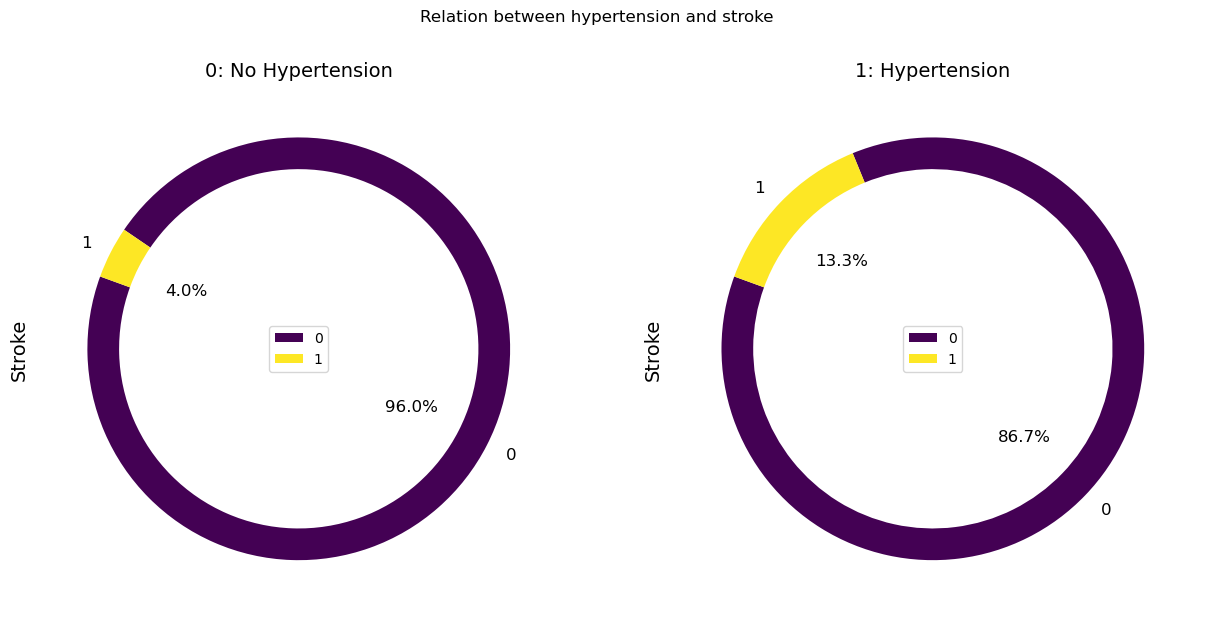

In [68]:
nstr_df = data[data['hypertension'] == 0]
str_df = data[data['hypertension'] == 1]

fig, axs = plt.subplots(1,2, figsize = [15,7])
fig.suptitle('Relation between hypertension and stroke')

nstr_df['stroke'].value_counts().plot.pie(ax = axs[0], fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, cmap='viridis')
axs[0].set_title('0: No Hypertension', size = 14)
axs[0].set_ylabel('Stroke', size = 14)
axs[0].legend(loc = 'center')

str_df['stroke'].value_counts().plot.pie(ax = axs[1], fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, cmap='viridis')
axs[1].set_title('1: Hypertension', size = 14)
axs[1].set_ylabel('Stroke', size = 14)
axs[1].legend(loc = 'center')


- **Hypertension or High Blood Pressure** if left untreated can lead to serious health conditions. .
- In our data we see that out all of the people who suffered from hypertension **13.3%** suffered a stroke.
- This suggests that hypertension is an important risk factor that increases the chances of a stroke. 

### Q3. Is there a relation between heart disease and stroke?

- To understand the relationship between Heart Disease and Stroke, we will first group the data based on the value of **heart_disease** column (0 or 1).
- After grouping we will use **pie plots** to understand heart diseases relate to stroke.

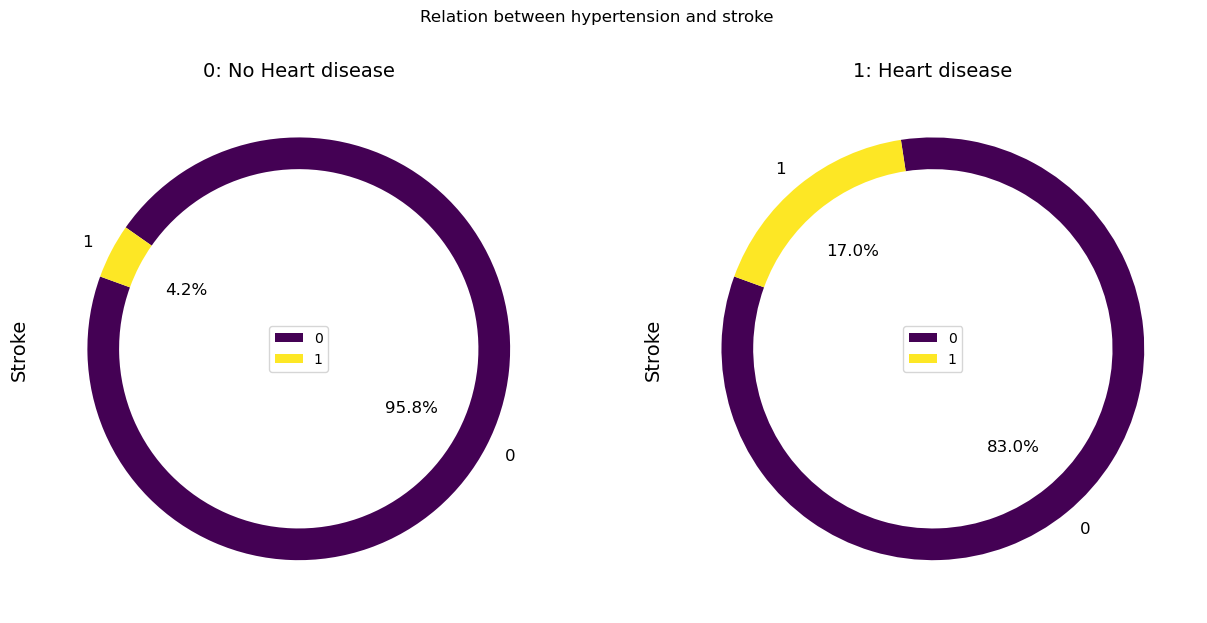

In [104]:
nstr_df = data[data['heart_disease'] == 0]
str_df = data[data['heart_disease'] == 1]

fig, axs = plt.subplots(1,2, figsize = [15,7])
fig.suptitle('Relation between hypertension and stroke')

nstr_df['stroke'].value_counts().plot.pie(ax = axs[0], fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, cmap='viridis')
axs[0].set_title('0: No Heart disease', size = 14)
axs[0].set_ylabel('Stroke', size = 14)
axs[0].legend(loc = 'center')

str_df['stroke'].value_counts().plot.pie(ax = axs[1], fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, cmap='viridis')
axs[1].set_title('1: Heart disease', size = 14)
axs[1].set_ylabel('Stroke', size = 14)
axs[1].legend(loc = 'center')
plt.show()

- From the graphs we see that out of all the people who had a heart disease, **17%** suffered from a stroke.

### Q.4 Is there a relation between age and hypertension?

- We have seen that **Age**, **Hypertension**, and **Heart disease** are important factors that can increase the chances of a stroke.
- Now we will study whether chances of getting hypertension and heart disease increase with age.

- To understand how Age relates to Hypertension we will use a countplot between **age_group** and **hypertension**.
- The countplot will be plotted using the plotly express function **px.histogram()**.

In [70]:
fig = px.histogram(data, x = 'age_group', color = 'hypertension', title = 'Age group Vs. Hypertension', text_auto=True).update_layout(
    xaxis_title="Age groups", yaxis_title="Count")
fig.show()

- We see that out of all the age-groups the highest number of people with hypertension are found in the age-group of **74-83 years (nearly 25% of the people in that age-group)**, followed by **65-75 years** and **56-65 years**.
- This suggests that the risk of hypertension increases with age.

### Q5. How age relates to heart diseases?

- We will use a countplot to understand how Age relates to heart diseases.
- The countplot will be plotted using the plotly express function **px.histogram()**.

In [71]:
fig = px.histogram(data, x = 'age_group', color = 'heart_disease', title = 'Age group Vs. Heart diseases', text_auto=True).update_layout(
    xaxis_title="Age groups", yaxis_title="Count")
fig.show()

- We see a similar trend for how age relates to heart diseases. The number of people with heart diseases is highest for the age-group **74-83 years**, followed by **65-74 years**, and **56-65 years**.
- The risk of heart diseases increases with age.
- Therefore, we see that **Age** is a critical factor which not only increases the risk of a stroke but also increases the risk of ailments such **Hypertension and Diabetes**. These ailments further increase the chances of a stroke.

### Q6. Does diabetes (increased avg. glucose levels) increase the risk of having a stroke?

- To understand whether Diabetes increases the risk of having a stroke, we will use a box plot to study the distribution of **avg_glucose_level** values for people who did not have a stroke and for people who did have a stroke.
- To plot the box plot we will use the plotly express function **px.box()**.

In [72]:
fig = px.box(data, y='avg_glucose_level', x = 'stroke', title = 'Average glucose level Vs. Stroke').update_layout(
    xaxis_title="Stroke", yaxis_title="Avg. glucose level")
fig.show()

- Normal average glucose levels vary between **70-100 mg/dL**.
- From the boxplot we see that the average glucose levels for people who suffered from a stroke are higher than those who didn't.
- The median value of average glucose level for people who suffered from a stroke is **105.22 mg/dL**, which is considered as pre-diabetic. This is in contrast to the median value of **91.47 mg/dL** for those who didn't suffer from a stroke.
- This suggests the diabetic and pre-diabetic people are more at risk of a stroke.

### Q7. Does a high bmi put you at a risk of a stroke?


- Similarly, to understand whether a high BMI increases the risk of having a stroke, we will use a box plot to study the distribution of **bmi** values for people who did not have a stroke and for people who did have a stroke.
- To plot the box plot we will use the plotly express function **px.box()**.

In [73]:
fig = px.box(data, y='bmi', x = 'stroke', title = 'BMI Vs. Stroke').update_layout(
    xaxis_title="Stroke", yaxis_title="BMI")
fig.show()

- A BMI value between **18.5 and <25** is considered healthy and a value **greater than 25** is not considered healthy.
- From the boxplot we see that the IQR of BMI for people who suffered from stroke is 5.5 as compared to the IQR of 9.2 for those who did not suffer from a stroke.
- These values suggest that the bmi values are more spread out for the people who did not suffer from a stroke as compared to the people who did.
- This suggests that an increased BMI could put you at a slightly higher risk of stroke, but that BMI alone is not a very good indicator of an increased risk of a stroke.



### Q8. Does smoking increase the risk of having a stroke?

- In this section we will first group the data based on the values of the **stroke** column (0 or 1).
- After grouping we will use **pie plots** to understand whether smoking increases the risk of a stroke or not.

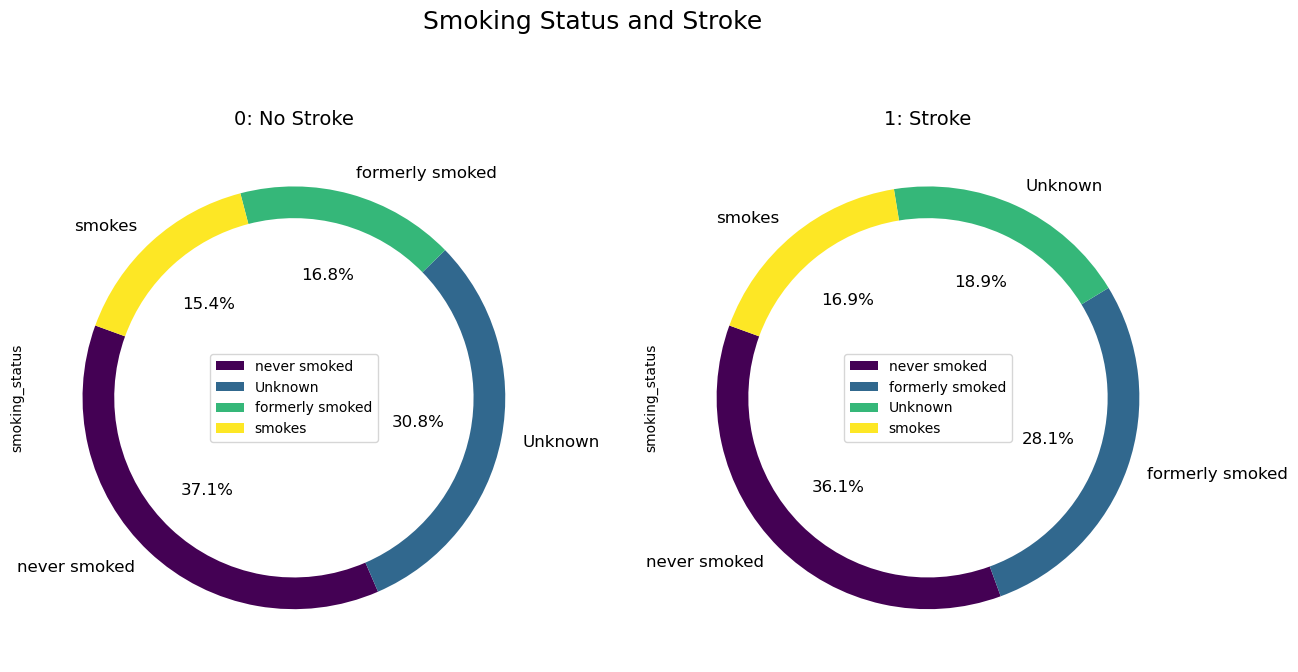

In [74]:
stroke_data = data[data['stroke'] == 1]
non_stroke_data = data[data['stroke'] == 0]

fig, axs = plt.subplots(1,2, figsize = [15,8])
fig.suptitle('Smoking Status and Stroke', size = 18)
non_stroke_data['smoking_status'].value_counts().plot.pie(ax = axs[0], fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, cmap='viridis')
axs[0].set_title('0: No Stroke', size = 14)
axs[0].legend(loc = 'center')

stroke_data['smoking_status'].value_counts().plot.pie(ax = axs[1], fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, cmap='viridis')
axs[1].set_title('1: Stroke', size = 14)
axs[1].legend(loc = 'center')

- From the data we see that from all the people that suffered from stroke nearly **17%** smoked and **28%** used to smoke.
- Therefore, we see that smoking puts you at a slightly higher risk of a stroke.

### Q9. Is a particular gender more likely to get a stroke?

- To understand the relation between Stroke and Gender, we will group the data based on the values of the **stroke** column (0 or 1).
- After grouping we will again use **pie plots** to understand if there is any relation between Gender and the risk of a stroke.

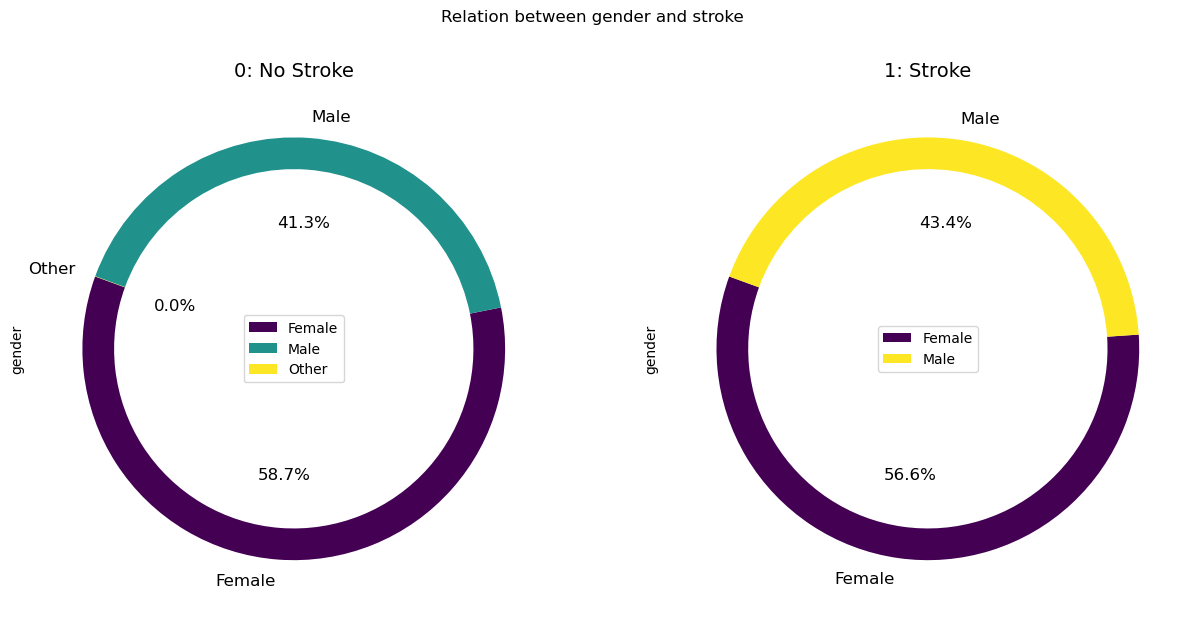

In [75]:
nstr_df = data[data['stroke'] == 0]
str_df = data[data['stroke'] == 1]

fig, axs = plt.subplots(1,2, figsize = [15,7])
fig.suptitle('Relation between gender and stroke')

nstr_df['gender'].value_counts().plot.pie(ax = axs[0], fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, cmap='viridis')
axs[0].set_title('0: No Stroke', size = 14)
axs[0].legend(loc = 'center')

str_df['gender'].value_counts().plot.pie(ax = axs[1], fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, cmap='viridis')
axs[1].set_title('1: Stroke', size = 14)
axs[1].legend(loc = 'center')

- Studies have shown that women are more at risk of stroke than their counterparts. 
- Our data also shows that out of the all people who suffered froma a stroke nearly **57%** were women.

**We have established that factors such as Age, Hypertension, Heart diseases, Diabetics, and BMI are factors that can increase the chances of a stroke.**<br>
**Now we will study how a combination of these factors effect the chances of getting a stroke.**

### Q10. Does diabetes (high avg. glucose levels) along with smoking increase the risk of a stroke?

- In this section we will use a Heatmap to understand the relation between Diabetes (High Avg. Glucose levels), Smoking, and Stroke.
- As a first step we will group the data based on the **smoking_status**, and **stroke** columns by using the **.groupby()** method. After grouping we will access the **avg_glucose_level** column and aggregate using the **mean()** function.
- We will then use **.pivot()** to reshape the dataframe based on the values of columns **smoking_status**, **stroke**, and **avg_glucose_level**.
- The Heatmap is plotted on the reshaped dataframe using the Plotly express function **px.imshow()**.

In [76]:
grp_data = data.groupby(['smoking_status', 'stroke'])['avg_glucose_level'].mean().reset_index()
grp_df = grp_data.pivot('smoking_status', 'stroke', 'avg_glucose_level')
fig = px.imshow(grp_df, text_auto=True).update_layout(xaxis_title="Stroke", yaxis_title="Smoking Status", xaxis = dict(
        tickvals = [0, 1],
        ticktext = ['0: No Stroke', '1: Stroke']))
fig.show()

C:\Users\Amey\AppData\Local\Temp\ipykernel_2316\3916536835.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



- From the heatmap we see that people who smoked and had a high avg. glucose level are definitely at an increased risk of a stroke.

### Q11. Does a high BMI along with smoking increase the risk of a stroke?

- In this section we will again use a Heatmap to understand the relation between BMI, Smoking, and Stroke.
- As a first step we will group the data based on the **smoking_status**, and **stroke** columns by using the **.groupby()** method. After grouping we will access the **bmi** column and aggregate using the **mean()** function.
- We will then use **.pivot()** to reshape the dataframe based on the values of columns **smoking_status**, **stroke**, and **bmi**.
- The Heatmap is plotted using the Plotly express function **px.imshow()**.

In [77]:
grp_data = data.groupby(['smoking_status', 'stroke'])['bmi'].mean().reset_index()
grp_df = grp_data.pivot('smoking_status', 'stroke', 'bmi')
fig = px.imshow(grp_df, text_auto=True).update_layout(xaxis_title="Stroke", yaxis_title="smoking_status", xaxis = dict(
        tickvals = [0, 1],
        ticktext = ['0: No Stroke', '1: Stroke']))
fig.show()

C:\Users\Amey\AppData\Local\Temp\ipykernel_2316\4243735392.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



- As we saw before BMI alone is not a significant indicator of increased risk of a stroke.
- But a High BMI along with Smoking increases the risk of suffering from a stroke.

### Q12. Does hypertension and Diabetes (high avg. glucose levels) increase the risk of a stroke?

- We will group the data based on the **hypertension**, and **stroke** columns by using the **.groupby()** method. After grouping we will access the **avg_glucose_level** column and aggregate using the **mean()** function.
- We will then use **.pivot()** to reshape the dataframe based on the values of columns **hypertension**, **stroke**, and **avg_glucose_level**.
- The Heatmap is plotted on the reshaped dataframe using the Plotly express function **px.imshow()**.

In [78]:
grp_data = data.groupby(['hypertension', 'stroke'])['avg_glucose_level'].mean().reset_index()
grp_df = grp_data.pivot('hypertension', 'stroke', 'avg_glucose_level')
fig = px.imshow(grp_df, text_auto=True).update_layout(xaxis_title="Stroke", yaxis_title="hypertension", xaxis = dict(
        tickvals = [0, 1],
        ticktext = ['0: No Stroke', '1: Stroke']))
fig.show()

C:\Users\Amey\AppData\Local\Temp\ipykernel_2316\1877322090.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



- We se that people who have **hypertension** also tend to have a **high avg. glucose levels**.
- Studies have shown that hypertension and diabetes are more the most common comorbidities. Hypertension is twice as common in patients with diabetes as compared to the patients who don't have diabetes.
- Therefore these results are not surprising. 
- People with hypertension and have high avg. glucose levels are certainly at a high risk of getting a stroke.

### Q13. Does hypertension and a high BMI increase the risk of a stroke?

- We will group the data based on the **hypertension**, and **stroke** columns by using the **.groupby()** method. After grouping we will access the **bmi** column and aggregate using the **mean()** function.
- We will then use **.pivot()** to reshape the dataframe based on the values of columns **hypertension**, **stroke**, and **bmi**.
- The Heatmap is plotted on the reshaped dataframe using the Plotly express function **px.imshow()**.

In [79]:
grp_data = data.groupby(['hypertension', 'stroke'])['bmi'].mean().reset_index()
grp_df = grp_data.pivot('hypertension', 'stroke', 'bmi')
fig = px.imshow(grp_df, text_auto=True).update_layout(xaxis_title="Stroke", yaxis_title="hypertension", xaxis = dict(
        tickvals = [0, 1],
        ticktext = ['0: No Stroke', '1: Stroke']))
fig.show()

C:\Users\Amey\AppData\Local\Temp\ipykernel_2316\1989376180.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



- We again see that a high BMI on it's own is not a very good indicator of increased risk of stroke.
- But a high BMI combined with hypertension increases the risk of stroke

### Q14. Do people with heart disease and diabetes have a high risk of diabetes?

- We will group the data based on the **heart_disease**, and **stroke** columns by using the **.groupby()** method. After grouping we will access the **avg_glucose_level** column and aggregate using the **mean()** function.
- We will then use **.pivot()** to reshape the dataframe based on the values of columns **heart_disease**, **stroke**, and **avg_glucose_level**.
- The Heatmap is plotted on the reshaped dataframe using the Plotly express function **px.imshow()**.

In [80]:
grp_data = data.groupby(['heart_disease', 'stroke'])['avg_glucose_level'].mean().reset_index()
grp_df = grp_data.pivot('heart_disease', 'stroke', 'avg_glucose_level')
fig = px.imshow(grp_df, text_auto=True).update_layout(xaxis_title="Stroke", yaxis_title="Heart Disease", xaxis = dict(
        tickvals = [0, 1],
        ticktext = ['0: No Stroke', '1: Stroke']))
fig.show()

C:\Users\Amey\AppData\Local\Temp\ipykernel_2316\4209770218.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



- People who are diabetic and have heart diseases are at certainly at risk of a stroke.

### Q15. What about people with  a heart disease and a high BMI?

- We will group the data based on the **heart_disease**, and **stroke** columns by using the **.groupby()** method. After grouping we will access the **bmi** column and aggregate using the **mean()** function.
- We will then use **.pivot()** to reshape the dataframe based on the values of columns **heart_disease**, **stroke**, and **bmi**.
- The Heatmap is plotted on the reshaped dataframe using the Plotly express function **px.imshow()**.

In [81]:
grp_data = data.groupby(['heart_disease', 'stroke'])['bmi'].mean().reset_index()
grp_df = grp_data.pivot('heart_disease', 'stroke', 'bmi')
fig = px.imshow(grp_df, text_auto=True).update_layout(xaxis_title="Stroke", yaxis_title="Heart Disease", xaxis = dict(
        tickvals = [0, 1],
        ticktext = ['0: No Stroke', '1: Stroke']))
fig.show()

C:\Users\Amey\AppData\Local\Temp\ipykernel_2316\1250936935.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



- A high BMI along with heart diseases increases the risk of a stroke.

### Q16. What is the relation between Age, Diabetes, and Stroke?

- We will group the data based on the **age_group**, and **stroke** columns by using the **.groupby()** method. After grouping we will access the **avg_glucose_level** column and aggregate using the **mean()** function.
- We will then use **.pivot()** to reshape the dataframe based on the values of columns **age_group**, **stroke**, and **avg_glucose_level**.
- The Heatmap is plotted on the reshaped dataframe using the Plotly express function **px.imshow()**.

In [82]:
grp_data = data.groupby(['age_group', 'stroke'])['avg_glucose_level'].mean().reset_index()
grp_df = grp_data.pivot('age_group', 'stroke', 'avg_glucose_level')
fig = px.imshow(grp_df, text_auto=True).update_layout(xaxis_title="Stroke", yaxis_title="Age-group", xaxis = dict(
        tickvals = [0, 1],
        ticktext = ['0: No Stroke', '1: Stroke']))
fig.show()

C:\Users\Amey\AppData\Local\Temp\ipykernel_2316\3547397883.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



- Age is definitely an important factor that increases the chances of getting a stroke.
- Old Age along with Diabetes (high avg. glucose levels) certainly increases the risk of stroke.

### Q17. How do Age, BMI and Stroke relate to each?

- We will group the data based on the **age_group**, and **stroke** columns by using the **.groupby()** method. After grouping we will access the **bmi** column and aggregate using the **mean()** function.
- We will then use **.pivot()** to reshape the dataframe based on the values of columns **age_group**, **stroke**, and **bmi**.
- The Heatmap is plotted on the reshaped dataframe using the Plotly express function **px.imshow()**.

In [83]:
grp_data = data.groupby(['age_group', 'stroke'])['bmi'].mean().reset_index()
grp_df = grp_data.pivot('age_group', 'stroke', 'bmi')
fig = px.imshow(grp_df, text_auto=True).update_layout(xaxis_title="Stroke", yaxis_title="Age-group", xaxis = dict(
        tickvals = [0, 1],
        ticktext = ['0: No Stroke', '1: Stroke']))
fig.show()

C:\Users\Amey\AppData\Local\Temp\ipykernel_2316\951803869.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



- A high BMI isn't necessarily a good indicator of increased risk of stroke. But old age along with a high BMI does increase the risk of stroke.

---
<a name=Section7></a>
# **7. Applying Random Forest Classifier**
---

In [84]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

- We see that there is a class imbalance in the dataset i.e. there are more data points for the class **0 (No Stroke)** then for the class **1 (Stroke)**.
- We will have to keep this in mind while splitting our data into train and test sets.

---
<a name=Section71></a>
### **7.1 Data Preparation**
---

#### Splitting the data into x and y.

In [85]:
x = data.drop(['stroke'], axis = 1)
y = data['stroke']

- We will drop the columns **id**, and **age_group**. **age_group** was created to make EDA easier, but a column named **age** already exists and thus we won't be using it for modeling.
- According to the EDA we found that factors such as **age**, **Hypertension (High Blood Pressure)**, **Diabetes (High average glucose levels)**, **Heart disease**, **Smoking status**, and **BMI** can help determine the risk of stroke.
- We will only consider the columns corresponding to the above factors.Therefore, we will also drop columns **work_type**, **Residence_type**, **ever_married**.

In [86]:
x.drop(labels=['id', 'age_group', 'work_type', 'Residence_type', 'ever_married'], axis = 1, inplace=True)

In [87]:
x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status'],
      dtype='object')

Since a lot of the columns are categorical we will have to perform encoding. We will use **Label Encoding**.
- We will perform Label Encoding on the columns **gender**, **work_type**, **Residence_type**, and **smoking_status**.

In [88]:
le = LabelEncoder()
for i in x.columns:
    if x[i].dtype == 'object':
        x[i] = le.fit_transform(x[i])

#### Splitting into training and testing sets

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=123, stratify=y)

In [90]:
X_train.shape

(4088, 7)

In [91]:
X_test.shape

(1022, 7)

---
<a name=Section72></a>
### **7.2 Baseline Model**
---

In [105]:
rfc = RandomForestClassifier(random_state=42)

# fitting on the training data
rfc.fit(X_train, Y_train)

training_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)

In [93]:
# generating a classification report for prediction based on train data
train_report = classification_report(y_true=Y_train, y_pred=training_pred)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3889
           1       1.00      0.99      0.99       199

    accuracy                           1.00      4088
   macro avg       1.00      0.99      1.00      4088
weighted avg       1.00      1.00      1.00      4088



In [94]:
# generating a classification report for prediction based on test data
test_report = classification_report(y_true=Y_test, y_pred=test_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.17      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.56      0.51      0.50      1022
weighted avg       0.91      0.95      0.93      1022



- We see that while both testing and training accuracy is 0.95, there is a huge difference between the precision and recall scores for the train set and test set.
- For the train set the precision and recall scores are 1. But for the test set while the precision and recall scores are high for **Class 0**, they are very low for **Class 1**.
- This suggests that the model has overfit the training data and that the model is not able to account for the class imbalance.

---
<a name=Section73></a>
### **7.3 Oversampling using SMOTE**
---

**SMOTE** or **Synthetic Minority Oversampling Technique** can be used to address the class imbalance problem.

In [95]:
sm = SMOTE(random_state = 42, sampling_strategy=1.0)
x1, y1 = sm.fit_resample(x, y)

X_new = pd.DataFrame(data = x1, columns = x.columns)

(X_train, X_test,
 Y_train, Y_test) = train_test_split(X_new, y1, test_size = 0.2, random_state = 42, stratify = y1)

In [96]:
X_train.shape

(7777, 7)

In [97]:
X_test.shape

(1945, 7)

In [98]:
Y_train.shape

(7777,)

In [99]:
Y_test.shape

(1945,)

- We see that after applying SMOTE the shape of X_train, X_test, Y_train, and Y_test have increased.

---
<a name=Section74></a>
### **7.4 Applying the model on the Oversampled Data**
---

In [100]:
rfc = RandomForestClassifier(random_state=42)

# fitting on the training data
rfc.fit(X_train, Y_train)

training_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)

In [101]:
# generating a classification report for prediction based on train data
train_report = classification_report(y_true=Y_train, y_pred=training_pred)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3888
           1       1.00      1.00      1.00      3889

    accuracy                           1.00      7777
   macro avg       1.00      1.00      1.00      7777
weighted avg       1.00      1.00      1.00      7777



In [102]:
# generating a classification report for prediction based on train data
test_report = classification_report(y_true=Y_test, y_pred=test_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       973
           1       0.93      0.96      0.94       972

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



- We see that oversampling was able to improve the testing accuracy. 
- The **F1 score** for **Class 1** went from **0.04** to **0.94**.

---
<a name=Section8></a>
# **8. Summarization**
---

- The dataset had **5110 observations** and **13 features**.
- Extensive EDA was carried out to understand the data and identify the features that could help us predict whether a person will experience a stroke or not.
- It was also found that the data had an uneven class distribution for the target variable.
- Random Forest Classifier was used to make the predictions.
- The uneven class distribution made it so that the baseline model was able to predict well for the training data, but was not able to perform the same for the testing data. The **F1 score** was especially poor for **Class 1**.
- **SMOTE** was used to address the class imbalance.
- Random Forest classifier was used to predict again on the oversampled data. Oversampling helped **increase** the model performance for the testing set.